In [1]:
import re
import math
import numpy as np
import nltk
import string
from sklearn import metrics
from collections import defaultdict, Counter
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import auc, confusion_matrix, recall_score, roc_curve, precision_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans

# Problem 1

In [2]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
data_all = fetch_20newsgroups(subset = 'all', categories = categories, shuffle = True, random_state = 42)


stop_words = text.ENGLISH_STOP_WORDS

vect_all = CountVectorizer(analyzer = 'word', stop_words = stop_words, min_df = 3)
counts_all = vect_all.fit_transform(data_all.data)
TFxIDF_transformer = TfidfTransformer()
TFxIDF_all = TFxIDF_transformer.fit_transform(counts_all)

print("The dimension of TF-IDF Vector with min_df=3 is",TFxIDF_all.shape)
print('The number of Terms Extracted with min_df=3 is',TFxIDF_all.shape[1])

The dimension of TF-IDF Vector with min_df=3 is (7882, 27768)
The number of Terms Extracted with min_df=3 is 27768


# Problem 2

In [3]:
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
km_all.fit(TFxIDF_all)

new_target = (data_all.target[:]<4)*1
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)


Homogeneity: 0.253
Completeness: 0.335
V-measure: 0.288
Adjusted Rand-Index: 0.181
Adjusted Mutual-Index: 0.253
The contingency matrix:
 [[2262 1717]
 [3899    4]] 




# Problem 3 (1)

In [4]:
# LSI dimension reduction at min_df=3
from sklearn.decomposition import TruncatedSVD

variance_ratio_LSI = list()
LSI = TruncatedSVD(n_components = 1000, random_state = 42)
TFxIDF_all_LSI = LSI.fit_transform(TFxIDF_all)
ratio_LSI = LSI.explained_variance_ratio_

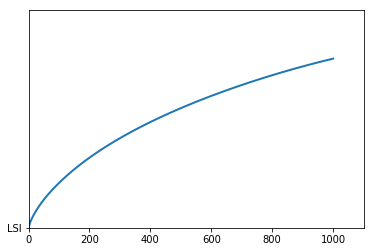

In [6]:
import matplotlib.pyplot as plt

x = np.arange(1, 1001, 1)
y_LSI = [(sum(ratio_LSI[:t])) for t in range(1,1001)]

plt.figure()
plt.xlim(1, 1100)
plt.ylim(0, 0.72)
plt.plot(x, y_LSI, '-', 'LSI', linewidth=2)
plt.show()

# Problem 3 (2)

In [7]:
gamma_choices = [1, 2, 3, 5, 10, 20, 50, 100, 300]
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
new_target = (data_all.target[:]>=4)*1

LSI_Homogeneity = list()
LSI_Completeness = list()
LSI_V_measure = list()
LSI_Adjusted_rand = list()
LSI_Adjusted_mutual_info = list()

# Do dimension reduction with LSI at min_df=3
print('@'*20,'Do dimension reduction with LSI at min_df=3','@'*20,'\n')
for gamma in gamma_choices:
    LSI = TruncatedSVD(n_components = gamma, random_state = 42)
    TFxIDF_all_LSI = LSI.fit_transform(TFxIDF_all)
    km_all.fit(TFxIDF_all_LSI)
    print('~'*10, '5 measure scores when γ is', gamma, '~'*10)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
    LSI_Homogeneity.append(metrics.homogeneity_score(new_target, km_all.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
    LSI_Completeness.append(metrics.completeness_score(new_target, km_all.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
    LSI_V_measure.append(metrics.v_measure_score(new_target, km_all.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
    LSI_Adjusted_rand.append(metrics.adjusted_rand_score(new_target, km_all.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
    LSI_Adjusted_mutual_info.append(metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
    print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

@@@@@@@@@@@@@@@@@@@@ Do dimension reduction with LSI at min_df=3 @@@@@@@@@@@@@@@@@@@@ 

~~~~~~~~~~ 5 measure scores when γ is 1 ~~~~~~~~~~
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: 0.000
Adjusted Mutual-Index: 0.000
The contingency matrix:
 [[2200 1703]
 [2323 1656]] 


~~~~~~~~~~ 5 measure scores when γ is 2 ~~~~~~~~~~
Homogeneity: 0.599
Completeness: 0.600
V-measure: 0.600
Adjusted Rand-Index: 0.703
Adjusted Mutual-Index: 0.599
The contingency matrix:
 [[3681  222]
 [ 415 3564]] 


~~~~~~~~~~ 5 measure scores when γ is 3 ~~~~~~~~~~
Homogeneity: 0.390
Completeness: 0.432
V-measure: 0.410
Adjusted Rand-Index: 0.377
Adjusted Mutual-Index: 0.390
The contingency matrix:
 [[3874   29]
 [1492 2487]] 


~~~~~~~~~~ 5 measure scores when γ is 5 ~~~~~~~~~~
Homogeneity: 0.221
Completeness: 0.310
V-measure: 0.258
Adjusted Rand-Index: 0.145
Adjusted Mutual-Index: 0.221
The contingency matrix:
 [[   5 3898]
 [1542 2437]] 


~~~~~~~~~~ 5 measure scores when γ is 10

In [8]:
# Do dimension reduction with NMF at min_df=3
from sklearn.decomposition import NMF

NMF_Homogeneity = list()
NMF_Completeness = list()
NMF_V_measure = list()
NMF_Adjusted_rand = list()
NMF_Adjusted_mutual_info = list()

print('@'*20,'Do dimension reduction with NMF at min_df=3','@'*20)
for gamma in gamma_choices:
    nmf = NMF(n_components = gamma, init = 'random', random_state = 0)
    TFxIDF_all_NMF = nmf.fit_transform(TFxIDF_all)
    km_all.fit(TFxIDF_all_NMF)
    print('~'*20, '5 measure scores when γ is', gamma, '~'*20)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
    NMF_Homogeneity.append(metrics.homogeneity_score(new_target, km_all.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
    NMF_Completeness.append(metrics.completeness_score(new_target, km_all.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
    NMF_V_measure.append(metrics.v_measure_score(new_target, km_all.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
    NMF_Adjusted_rand.append(metrics.adjusted_rand_score(new_target, km_all.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
    NMF_Adjusted_mutual_info.append(metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
    print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

@@@@@@@@@@@@@@@@@@@@ Do dimension reduction with NMF at min_df=3 @@@@@@@@@@@@@@@@@@@@
~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 1 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: 0.000
Adjusted Mutual-Index: 0.000
The contingency matrix:
 [[1703 2200]
 [1656 2323]] 


~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 2 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.593
Completeness: 0.608
V-measure: 0.600
Adjusted Rand-Index: 0.649
Adjusted Mutual-Index: 0.593
The contingency matrix:
 [[ 731 3172]
 [3943   36]] 


~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 3 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.238
Completeness: 0.317
V-measure: 0.272
Adjusted Rand-Index: 0.170
Adjusted Mutual-Index: 0.237
The contingency matrix:
 [[  13 3890]
 [1674 2305]] 


~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 5 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.380
Completeness: 0.435
V-measure: 0.405
Adjusted Rand-Index: 0.352
Adjusted Mutual-Index: 0.380
The contingency m

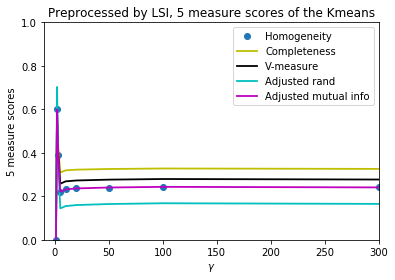

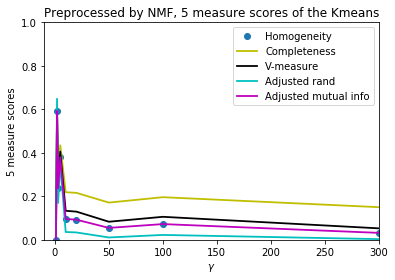

In [9]:
gamma_choices = [1, 2, 3, 5, 10, 20, 50, 100, 300]

plt.figure(1)
plt.xlim(-10, 300)
plt.ylim(0, 1)
plt.title('Preprocessed by LSI, 5 measure scores of the Kmeans')
plt.xlabel(r'$\gamma$')
plt.ylabel('5 measure scores')
plt.plot(gamma_choices, LSI_Homogeneity, 'o', gamma_choices, LSI_Completeness, 'y', gamma_choices, LSI_V_measure, 'k', 
         gamma_choices, LSI_Adjusted_rand, 'c', gamma_choices, LSI_Adjusted_mutual_info,'m', linewidth=1.8)
plt.legend(('Homogeneity', 'Completeness', 'V-measure', 'Adjusted rand', 'Adjusted mutual info'), loc='upper right')
plt.show()


plt.figure(2)
plt.xlim(-10, 300)
plt.ylim(0, 1)
plt.title('Preprocessed by NMF, 5 measure scores of the Kmeans')
plt.xlabel(r'$\gamma$')
plt.ylabel('5 measure scores')
plt.plot(gamma_choices, NMF_Homogeneity, 'o', gamma_choices, NMF_Completeness, 'y', gamma_choices, NMF_V_measure, 'k', 
         gamma_choices, NMF_Adjusted_rand, 'c', gamma_choices, NMF_Adjusted_mutual_info, 'm', linewidth=1.8)
plt.legend(('Homogeneity', 'Completeness', 'V-measure', 'Adjusted rand', 'Adjusted mutual info'), loc='upper right')
plt.show()


# Problem 4(a)

In [10]:
def draw_plot2 (data, kmeans):
    for i in range(data.shape[0]):
        if (new_target[i] == 0):
            color = 'k'
        else:
            color = 'r'
        plt.scatter(data[i, 0], data[i, 1], color=color)

    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='w', linewidth=2)
    plt.show()
    
def draw_decision(data,kmeans,scaling_factor):
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - scaling_factor, data[:, 0].max() + scaling_factor
    y_min, y_max = data[:, 1].min() - scaling_factor, data[:, 1].max() + scaling_factor
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(data[:, 0], data[:, 1], 'k.', markersize=1)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

The visualization of the LSI
Number of components: 2


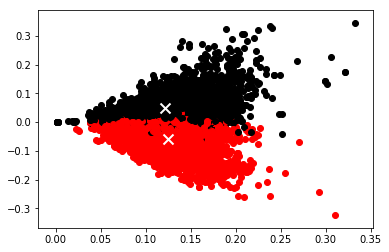

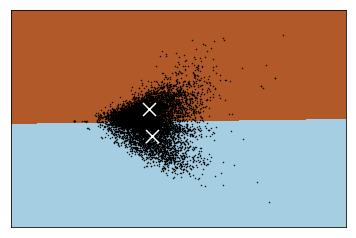

In [11]:
#best values for SVD n_components = 2
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
LSI = TruncatedSVD(n_components = 2, random_state = 42)
TFxIDF_all_LSI = LSI.fit_transform(TFxIDF_all)
km_all.fit(TFxIDF_all_LSI)
print('The visualization of the LSI')
print("Number of components: 2")
draw_plot2 (TFxIDF_all_LSI,km_all)
draw_decision(TFxIDF_all_LSI,km_all,0.1)

The visualization of the NMF
Number of components: 2


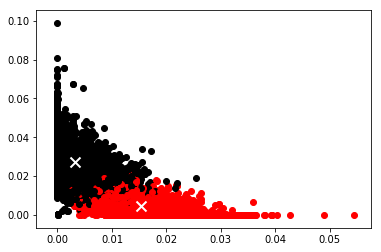

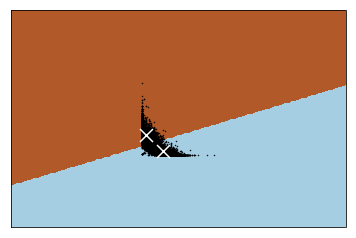

In [12]:
#best values for NMF n_components = 2
from sklearn.decomposition import NMF

NMF = NMF(n_components = 2, init = 'random', random_state = 0)
TFxIDF_all_NMF = NMF.fit_transform(TFxIDF_all)
km_all.fit(TFxIDF_all_NMF)
print('The visualization of the NMF')
print("Number of components: 2")
draw_plot2 (TFxIDF_all_NMF,km_all)
draw_decision(TFxIDF_all_NMF,km_all,0.1)

# Problem 4(b)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

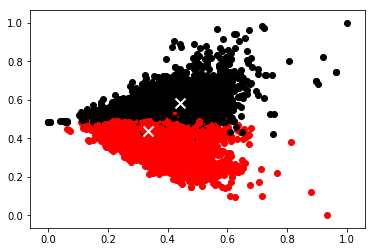

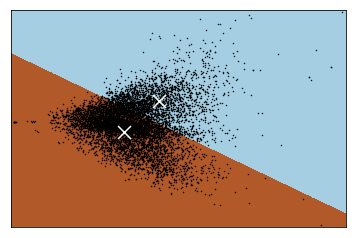

Homogeneity: 0.259
Completeness: 0.289
V-measure: 0.273
Adjusted Rand-Index: 0.279
Adjusted Mutual-Index: 0.259
The contingency matrix:
 [[2256 1647]
 [ 212 3767]] 




In [14]:
# Do the scaling after LSI

LSI = TruncatedSVD(n_components = 2, random_state = 42)
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)

TFxIDF_all_LSI = LSI.fit_transform(TFxIDF_all)
scale = MinMaxScaler()
TFxIDF_all_LSI_scaled = scale.fit_transform(TFxIDF_all_LSI)
km_all.fit(TFxIDF_all_LSI_scaled)

draw_plot2(TFxIDF_all_LSI_scaled, km_all)
draw_decision(TFxIDF_all_LSI_scaled, km_all, 0.01)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

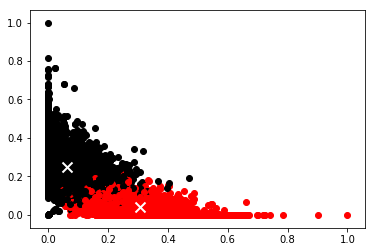

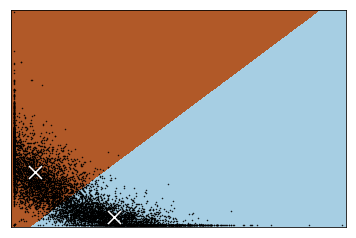

Homogeneity: 0.677
Completeness: 0.678
V-measure: 0.678
Adjusted Rand-Index: 0.774
Adjusted Mutual-Index: 0.677
The contingency matrix:
 [[ 326 3577]
 [3831  148]] 




In [15]:
# Do the scaling after NMF

NMF = NMF(n_components = 2, init = 'random', random_state = 0)
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)

TFxIDF_all_NMF = NMF.fit_transform(TFxIDF_all)
scale = MinMaxScaler()
TFxIDF_all_NMF_scaled = scale.fit_transform(TFxIDF_all_NMF)
km_all.fit(TFxIDF_all_NMF_scaled)

draw_plot2(TFxIDF_all_NMF_scaled, km_all)
draw_decision(TFxIDF_all_NMF_scaled, km_all, 0.01)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

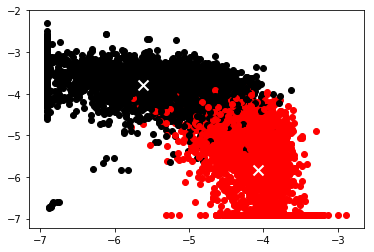

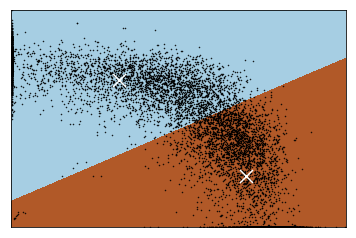

Homogeneity: 0.706
Completeness: 0.707
V-measure: 0.707
Adjusted Rand-Index: 0.801
Adjusted Mutual-Index: 0.706
The contingency matrix:
 [[3761  142]
 [ 272 3707]] 




In [16]:
from sklearn.decomposition import NMF

# Do the non-linear transformation only
NMF = NMF(n_components = 2, init = 'random', random_state = 0)
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)

TFxIDF_all_NMF = NMF.fit_transform(TFxIDF_all)
log_NMF = np.log(0.001 + TFxIDF_all_NMF)
km_all.fit(log_NMF)

draw_plot2(log_NMF, km_all)
draw_decision(log_NMF, km_all, 0.01)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

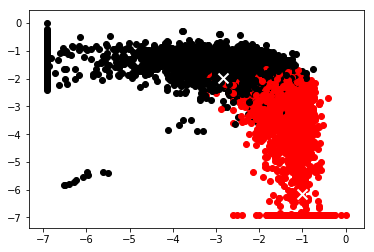

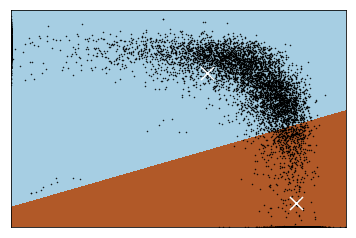

Do scaling before the non-linear transformation
Homogeneity: 0.275
Completeness: 0.354
V-measure: 0.310
Adjusted Rand-Index: 0.201
Adjusted Mutual-Index: 0.275
The contingency matrix:
 [[3903    0]
 [2172 1807]] 




In [17]:
from sklearn.decomposition import NMF

NMF = NMF(n_components = 2, init = 'random', random_state = 0)
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
scale = MinMaxScaler()

# Do scaling before the non-linear transformation
TFxIDF_all_NMF = NMF.fit_transform(TFxIDF_all)
scaled_NMF = scale.fit_transform(TFxIDF_all_NMF)
scaled_log_NMF = np.log(0.001 + scaled_NMF)

km_all.fit(scaled_log_NMF)

draw_plot2(scaled_log_NMF, km_all)
draw_decision(scaled_log_NMF, km_all, 0.01)
print('Do scaling before the non-linear transformation')
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)




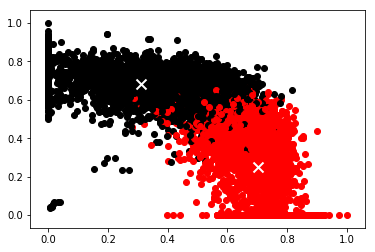

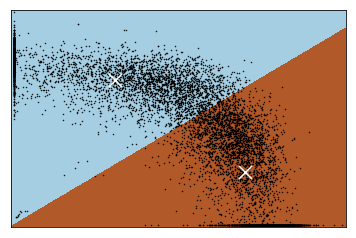

Do the non-linear transformation before scaling
Homogeneity: 0.709
Completeness: 0.709
V-measure: 0.709
Adjusted Rand-Index: 0.806
Adjusted Mutual-Index: 0.709
The contingency matrix:
 [[3693  210]
 [ 192 3787]] 




In [18]:
from sklearn.decomposition import NMF

# Do the non-linear transformation before scaling 
NMF = NMF(n_components = 2, init = 'random', random_state = 0)
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
scale = MinMaxScaler()

TFxIDF_all_NMF = NMF.fit_transform(TFxIDF_all)
log_NMF = np.log(0.001 + TFxIDF_all_NMF)
log_scaled_NMF = scale.fit_transform(log_NMF)
km_all.fit(log_scaled_NMF)

draw_plot2(log_scaled_NMF, km_all)
draw_decision(log_scaled_NMF, km_all, 0.01)
print('Do the non-linear transformation before scaling')
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

# Problem 5

In [19]:
data_20 = fetch_20newsgroups(subset = 'all', shuffle = True, random_state = 42)

stop_words = text.ENGLISH_STOP_WORDS

vect_20 = CountVectorizer(analyzer = 'word', stop_words = stop_words, min_df = 3)
counts_20 = vect_20.fit_transform(data_20.data)
TFxIDF_transformer = TfidfTransformer()
TFxIDF_20 = TFxIDF_transformer.fit_transform(counts_20)

print("The dimension of TF-IDF Vector with min_df=3 is",TFxIDF_20.shape)
print('The number of Terms Extracted with min_df=3 is',TFxIDF_20.shape[1])

km_20 = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
km_20.fit(TFxIDF_20)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

The dimension of TF-IDF Vector with min_df=3 is (18846, 52295)
The number of Terms Extracted with min_df=3 is 52295
Homogeneity: 0.325
Completeness: 0.392
V-measure: 0.355
Adjusted Rand-Index: 0.129
Adjusted Mutual-Index: 0.322
The contingency matrix:
 [[  0 210   1 135   0   0   1   0  60 143 155   2   4   0   0   9  40   1
    0  38]
 [  0  10  17   0   0  74   0   0 107 198   1   9   1   0   2   2 552   0
    0   0]
 [ 10   7   3   0   2 538   0   0  75 114   0  10   0   0  11   0 215   0
    0   0]
 [202   2  12   0   0  88   0   0 131 117   0  30   0   2   5   5 388   0
    0   0]
 [ 71   4  12   0   0   8   0   0  81 246   0  30   0   0   1  15 495   0
    0   0]
 [  0   2  29   0   0 102   0   0 155 106   0   6   0   0   2  17 566   3
    0   0]
 [ 50   7   4   0   0  21   0   0 130 364   0  47   6  12   7  14 310   0
    3   0]
 [  0 261  10   0   0   2   0   0 301 224   0  42   4   0   1  11 115   0
   19   0]
 [  0  22  17   0   0   0   0   0 125  81   0  16   0   0   1   9  

In [27]:
gamma_choices = [1, 2, 3, 5, 8, 9, 10, 15, 20, 50, 100]

LSI_Homogeneity = list()
LSI_Completeness = list()
LSI_V_measure = list()
LSI_Adjusted_rand = list()
LSI_Adjusted_mutual_info = list()

# Do dimension reduction with LSI at min_df=3 and try to find the best gamma
print('@'*20,'Do dimension reduction with LSI at min_df=3','@'*20,'\n')
for gamma in gamma_choices:
    LSI = TruncatedSVD(n_components = gamma, random_state = 42)
    TFxIDF_20_LSI = LSI.fit_transform(TFxIDF_20)
    km_20.fit(TFxIDF_20_LSI)
    print('~'*10, '5 measure scores when γ is', gamma, '~'*10)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
    LSI_Homogeneity.append(metrics.homogeneity_score(data_20.target, km_20.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
    LSI_Completeness.append(metrics.completeness_score(data_20.target, km_20.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
    LSI_V_measure.append(metrics.v_measure_score(data_20.target, km_20.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
    LSI_Adjusted_rand.append(metrics.adjusted_rand_score(data_20.target, km_20.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
    LSI_Adjusted_mutual_info.append(metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
    print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

@@@@@@@@@@@@@@@@@@@@ Do dimension reduction with LSI at min_df=3 @@@@@@@@@@@@@@@@@@@@ 

~~~~~~~~~~ 5 measure scores when γ is 1 ~~~~~~~~~~
Homogeneity: 0.028
Completeness: 0.031
V-measure: 0.030
Adjusted Rand-Index: 0.006
Adjusted Mutual-Index: 0.025
The contingency matrix:
 [[ 85  22  21  76   5   3  88  80  41  53  12  91  20   0  20  61   0  69
    0  52]
 [ 42  98   5  83   3  59  70  25 118 132   2  52  83   2   2 106  51  30
    2   8]
 [ 61  60  16 112   0  40 131  38  90 102   3  84  35  15   4 112  17  38
    0  27]
 [ 54  77  10 111   0  45  97  31  90  99   1  89  57   0   2 110  11  64
    0  34]
 [ 64  72   7 110   3  36  97  37 101 102   2  72  58   0   1 109  20  48
    0  24]
 [ 30 119   5  81   7 101  71  16 119 103   1  51  94   3   1  94  64  23
    0   5]
 [ 39  84   3  94   1  69  62   9 128 119   0  73 107   0   0 107  42  28
    0  10]
 [ 52  74  11 113   1  49 112  31  81  91   1  84  62   0   9 120  15  55
    0  29]
 [ 46  80   6 136   0  32  90  38 110 121   

~~~~~~~~~~ 5 measure scores when γ is 9 ~~~~~~~~~~
Homogeneity: 0.332
Completeness: 0.369
V-measure: 0.350
Adjusted Rand-Index: 0.132
Adjusted Mutual-Index: 0.330
The contingency matrix:
 [[269 124   0  23   0   0   1  32   0  54   0   1  12   7   0   3 130   0
   22 121]
 [  1   1   1 324   0   0   0  82   4   0   0  14   9   0 231 185  31   0
    1  89]
 [  0   0   0 157   0   0   0  65  27   0   2   5   6   0 491 192  10   0
    0  30]
 [  0   0   1 192   0   0   0 121 215   0  72   5  24   0 133 171  11   6
    0  31]
 [  0   0   0 200   0   0   0  83 141   0  13   8  33   0  54 301  23   2
    1 104]
 [  0   1  11 406   0   0   0 102   1   0   0  23   4   0 254 131   8   0
    0  47]
 [  1   3   0 207   2   0   0 115  82   0   8   5  42   0  29 223  27  20
    0 211]
 [  0  10   0  95   0   0   0 296   0   0   0   7  30   0   2  18 252  10
   32 238]
 [  5  34   0 131   0   0   0 403   0   0   0  14  14   0   5   8 184  29
    6 163]
 [  0   8   0  45 120   0   0 116   0   0   0  

~~~~~~~~~~ 5 measure scores when γ is 100 ~~~~~~~~~~
Homogeneity: 0.268
Completeness: 0.380
V-measure: 0.314
Adjusted Rand-Index: 0.082
Adjusted Mutual-Index: 0.265
The contingency matrix:
 [[  0  71 101  26  41   0   1  87   0   0   0 239 167  23  40   2   0   1
    0   0]
 [  0  83 151   7   0 201   0   0   2   0   0 508   1  17   0   1   2   0
    0   0]
 [  0  37  86  15   0 582   0   0   2   0   0 235   0  14   1   0  11   0
    0   2]
 [  2  32 151  31   0 477   0   1   3   0   0 273   0   8   0   0   4   0
    0   0]
 [  0  24 121  23   0 209   0   0  14   0   0 549   0  21   1   0   1   0
    0   0]
 [  0  99 222   4   0 207   4   0   2   0   0 446   0   2   0   0   2   0
    0   0]
 [ 14   5 172  14   0 124   0   0  33   0   0 595   0   6   0   5   7   0
    0   0]
 [  0  25 500  22   0   2   0   0  31   0   0 346   0  46  14   3   1   0
    0   0]
 [  0 106 569   9   0   0   0   0   6   0   0 292   0  12   1   0   1   0
    0   0]
 [403   2 161   2   0   0   0   0   7   0   0

In [28]:
# Do dimension reduction with NMF at min_df=3 and try to find the best gamma
from sklearn.decomposition import NMF

NMF_Homogeneity = list()
NMF_Completeness = list()
NMF_V_measure = list()
NMF_Adjusted_rand = list()
NMF_Adjusted_mutual_info = list()

print('@'*20,'Do dimension reduction with NMF at min_df=3','@'*20)
for gamma in gamma_choices:
    nmf = NMF(n_components = gamma, init = 'random', random_state = 0)
    TFxIDF_20_NMF = nmf.fit_transform(TFxIDF_20)
    km_20.fit(TFxIDF_20_NMF)
    print('~'*20, '5 measure scores when γ is', gamma, '~'*20)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
    NMF_Homogeneity.append(metrics.homogeneity_score(data_20.target, km_20.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
    NMF_Completeness.append(metrics.completeness_score(data_20.target, km_20.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
    NMF_V_measure.append(metrics.v_measure_score(data_20.target, km_20.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
    NMF_Adjusted_rand.append(metrics.adjusted_rand_score(data_20.target, km_20.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
    NMF_Adjusted_mutual_info.append(metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
    print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

@@@@@@@@@@@@@@@@@@@@ Do dimension reduction with NMF at min_df=3 @@@@@@@@@@@@@@@@@@@@
~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 1 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.028
Completeness: 0.031
V-measure: 0.029
Adjusted Rand-Index: 0.006
Adjusted Mutual-Index: 0.025
The contingency matrix:
 [[ 69  54  20  12  75  79  24  93   1  83  39  23   5  20  54  83   0   6
    0  59]
 [ 28 120  90   2  80  23   5  54  47  67 127  93   3   3  11  42  14  62
    2 100]
 [ 37  99  40   3 107  39  16  85  17 128  93  55   0   4  29  60  20  46
    0 107]
 [ 62  90  55   1 105  33  13  89  18  96  90  84   0   2  31  55   2  44
    0 112]
 [ 47 105  57   2 104  38   7  72  28  96  98  76   3   1  24  65   1  37
    0 102]
 [ 23 100 103   1  77  16   5  51  70  68 118 110   7   1   6  31  11 100
    0  90]
 [ 27 123  96   0  93  11   3  71  50  60 120  97   1   0  10  41   0  79
    0  93]
 [ 53  94  65   1 113  33  14  84  21 108  77  72   1   9  27  54   1  53
    0 110]
 [ 29 112  65   0 134  41 

~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 9 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.299
Completeness: 0.326
V-measure: 0.312
Adjusted Rand-Index: 0.118
Adjusted Mutual-Index: 0.297
The contingency matrix:
 [[ 80   0  50   1   1  10  43  46   2 199   0   0   0  70   0 121   1  75
   40  60]
 [ 44 267   2   0   0   0 298   0  10   1   4   0   0  44   1   5   8 174
    6 109]
 [ 49 521   2   2   0   0 152   0   9   0  26   2   0  22   2   3   2 104
    2  87]
 [ 83 103   1   7   0   0 203   0  11   0 201  88   0  48   4   0   1 113
    9 110]
 [ 55  45   1   4   0   0 257   0   8   0 129  15   0  91   2   6   4 258
    2  86]
 [ 63 301   0   0   0   0 282   0  18   0   1   0   0  31  12   3  15 107
    3 152]
 [ 66  27   0  19   0   0 153   0   9   1  90  12   3 147   1   4   1 330
   10 102]
 [158   3  71   6   0   0  97   0  14   0   2   0   0  88   0  61   4 213
   34 239]
 [262   2  53  21   0   0  91   0  19   3   2   0   0  65   0  18   2 143
   75 240]
 [ 93   0   3 405   0   0  

~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 100 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.120
Completeness: 0.240
V-measure: 0.160
Adjusted Rand-Index: 0.014
Adjusted Mutual-Index: 0.117
The contingency matrix:
 [[385   0   0   4   2   0   0   0  30  42   0   0   0 227   0   1   6   0
  102   0]
 [803   0  12   6   7   3   0   3  19   0   5   8  12  61   0   0   9  24
    1   0]
 [765   0  18   1   6   1  34  17  21   0   7   0   9  77   0   0  13  16
    0   0]
 [695   1  17   4   8   2  14  12   8   0   0   0  63  70   0   0  16  72
    0   0]
 [350   0  20   2   1   2  14   6  15   0   3   0  87  27   0   0  11 425
    0   0]
 [831   0  29   8   5   1  11   9   3   0   3  19   9  40   0   6  12   2
    0   0]
 [810   0  16   9  19   9   1   7   6   0   2   0  17  33   0   0   9  36
    1   0]
 [698   0  44   7  13   1   0  21  47   0   2   0   0 149   0   0   6   2
    0   0]
 [695   0  39  51   9   9   0  14  10   0  36   0   0 109   0   0  16   8
    0   0]
 [649   0  24   5 103   1

In [23]:
# Do the scaling after LSI with best gamma
best_gamma_lsi = 8
LSI = TruncatedSVD(n_components = best_gamma_lsi, random_state = 42)
TFxIDF_20_LSI = LSI.fit_transform(TFxIDF_20)
scaled_LSI_20 = scale.fit_transform(TFxIDF_20_LSI)
km_20.fit(scaled_LSI_20)

print('~'*10, 'Do the scaling after NMF, 5 measure scores when γ is', best_gamma_lsi, '~'*10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)


# Do the scaling after NMF with best gamma
best_gamma_nmf = 10
nmf = NMF(n_components = best_gamma_nmf, init = 'random', random_state = 0)
TFxIDF_20_NMF = nmf.fit_transform(TFxIDF_20)
scaled_NMF_20 = scale.fit_transform(TFxIDF_20_NMF)
km_20.fit(scaled_NMF_20)

print('~'*10, 'Do the scaling after NMF, 5 measure scores when γ is', best_gamma_nmf, '~'*10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

~~~~~~~~~~ Do the scaling after NMF, 5 measure scores when γ is 8 ~~~~~~~~~~
Homogeneity: 0.302
Completeness: 0.332
V-measure: 0.316
Adjusted Rand-Index: 0.124
Adjusted Mutual-Index: 0.300
The contingency matrix:
 [[  0   0 113 236   1  42   0   0  40   0  10  54  31   6 123  84   0   5
    3  51]
 [ 31  17  35   1   0   5   0   0  64   0   9   0 176   0   2  48   0 359
   73 153]
 [ 43   3  10   0   0   2   6   0  58   0   7   0  96   0   0  22   0 361
  280  97]
 [319   2  15   0   0   1 125   3  90   0  24   0 112   0   0  32   2 117
   51  89]
 [298   3  26   0   0   3  25   1  68   0  30   0 136   0   0  77   0  78
   20 198]
 [  2  21  12   0   0   0   0   0  88   0   4   0 213   0   0  29   4 434
   82  99]
 [142   1  25   1   0   1  22  13  85   0  39   0 214   0   1  58   0  32
   11 330]
 [  3   6 195   0   0  41   0   3 253   0  29   0 146   0   4 134   0   9
    0 167]
 [  0  14 173   6   0  14   0   9 378   0  10   0 136   0  24  90   1  21
    0 120]
 [  0   3  80   0   0

In [24]:
# Do the non-linear transformation only
nmf = NMF(n_components = best_gamma_nmf, init = 'random', random_state = 0)
TFxIDF_20_NMF = nmf.fit_transform(TFxIDF_20)
NMF_log_20 = np.log(0.001+TFxIDF_20_NMF)
km_20.fit(NMF_log_20)

print('~'*10, 'Do the non-linear transformation only, 5 measure scores when γ is', best_gamma_nmf, '~'*10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

~~~~~~~~~~ Do the non-linear transformation only, 5 measure scores when γ is 10 ~~~~~~~~~~
Homogeneity: 0.377
Completeness: 0.381
V-measure: 0.379
Adjusted Rand-Index: 0.216
Adjusted Mutual-Index: 0.375
The contingency matrix:
 [[ 53  19   0   1   4   0 202   1  22   0   1 124  85  31   2   0 201   4
    9  40]
 [  1  14 322  64  24  30   0   3   0   8  10   0   6  77 147  19   1 119
   36  92]
 [  2   5 476  60  14  46   1   4   0   4   5   0   7  22 202  35   0  59
   21  22]
 [  2   8  66 167  14 259   0   6   0   2   8   0   0  32  56 284   1  41
   27   9]
 [  0  15  36 253  13 159   0   1   2   4   8   0   6  81  22 280   0  35
   24  24]
 [  1   6 333  11  35  19   2  16   0   3  10   1   3  49 314   2   0 126
   29  28]
 [  2  32  24 189  13  97   1   2   1  34  42   2   1 186  41 245   0   6
   25  32]
 [ 81 340   5  27  23  28   1   7   7   8  41   1  30 120  71   8   3  14
  136  39]
 [ 66 271   1   7  25  30   1   2   4   5 156   0  99  67  64  15  17  24
  126  16]
 [  0  

In [25]:
# Do the scaling after non-linear transformation
nmf = NMF(n_components = best_gamma_nmf, init = 'random', random_state = 0)
TFxIDF_20_NMF = nmf.fit_transform(TFxIDF_20)
NMF_log_20 = np.log(0.001+TFxIDF_20_NMF)
log_scaled_20 = scale.fit_transform(NMF_log_20)
km_20.fit(log_scaled_20)

print('~'*10, 'Do the scaling after non-linear transformation, 5 measure scores when γ is', best_gamma_nmf, '~'*10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

~~~~~~~~~~ Do the scaling after non-linear transformation, 5 measure scores when γ is 10 ~~~~~~~~~~
Homogeneity: 0.355
Completeness: 0.363
V-measure: 0.359
Adjusted Rand-Index: 0.176
Adjusted Mutual-Index: 0.353
The contingency matrix:
 [[177  13   5   4   2  30 135   0   0   4   0  74  76   5   1   1  77   1
    1 193]
 [  2 136  43  20   9   0   0 176  17 268   1   1   4 117  11   2  14 152
    0   0]
 [  0  53  27   9   4   0   0 303  39 276   0   0   6  62   4   1   7 193
    0   1]
 [  1  60  62  18   3   0   0  69 343 106   3   0   5  49  15   4  16 228
    0   0]
 [  0 120  55  12  12   0   0  47 389 121   1  14   8  37  10   1  20 116
    0   0]
 [  0  46  29  30   3   0   1 214   1 226   0   3   0 125   9   9  10 280
    0   2]
 [  0  93  44  12  61   0   2  15 355 155   8  15   2   6  54   2  35 115
    0   1]
 [  3  93 171  25  22  50   1   3  17  48   0  50  25  12  63   5 330  71
    0   1]
 [ 13  43 138  27  28  71   2   0  24  19   0  20 106  15 176   2 258  53
    0   1

In [26]:
# Do non-linear transformation after the scaling
nmf = NMF(n_components = best_gamma_nmf, init = 'random', random_state = 0)
TFxIDF_20_NMF = nmf.fit_transform(TFxIDF_20)
scaled_20 = scale.fit_transform(TFxIDF_20_NMF)
scaled_log_20 = np.log(0.001+scaled_20)
km_20.fit(scaled_log_20)

print('~'*10, 'Do non-linear transformation after the scaling, 5 measure scores when γ is', best_gamma_nmf, '~'*10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

~~~~~~~~~~ Do the scaling after non-linear transformation, 5 measure scores when γ is 10 ~~~~~~~~~~
Homogeneity: 0.285
Completeness: 0.289
V-measure: 0.287
Adjusted Rand-Index: 0.134
Adjusted Mutual-Index: 0.283
The contingency matrix:
 [[  0  23  48 187   7   0   1   0 107   0  73 106   1  41   3   4  20   0
  177   1]
 [ 49 132   0   2 133   0  87  32   0   2   6  99  12  40   0  69   1 132
    0 177]
 [ 41  61   0   2 121   0 156  55   0   0   3  34   2  42   0  50   1 133
    0 284]
 [145  45   3   0 110   2 165 279   3   1   9   7  10  40   0  73   3  44
    0  43]
 [263  74   1   5  97   2  43 271   6   7   4   8   9  30   7  65  13  28
    0  30]
 [ 21  66   0   2 212   2 178   5   0   1   0  53  22  58   0  46   0 144
    0 178]
 [153  46   1   3 111   5  43 294   7  36   7  26  13   4  11 132  27   5
    2  49]
 [312  22  22   6  83   5  25   2  79   6  29  78  22  50  11  35 185   5
    2  11]
 [155   4  63   3  52   3  40   7  41  10  96 114  19  62   4  87 212   2
   14   8